In [1]:
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, get_dataset
import torch
from pykeen.evaluation import evaluate, RankBasedEvaluator
from pykeen.metrics.ranking import HitsAtK
import pandas as pd
from pykeen.trackers import ConsoleResultTracker

seed = 1234

In [2]:
def show_metrics(dictionary):
    for key in dictionary.keys():
        print(key)
        print(pd.DataFrame(dictionary[key]))

For transE, and therefore for transductive link prediction, it is necessary that all the entities and relations are present in the train set

In [3]:
batch_size = 8

In [4]:
from pykeen.hpo import hpo_pipeline
import os
from pykeen.triples import TriplesFactory

TRAIN_PATH = "MSCallGraph_train_transductive.tsv"
TEST_PATH = "MSCallGraph_test_transductive.tsv"
VALIDATE_PATH = "MSCallGraph_validation_transductive.tsv"


training = TriplesFactory.from_path(TRAIN_PATH)
testing = TriplesFactory.from_path(
    TEST_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)
validation = TriplesFactory.from_path(
    VALIDATE_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)

pipeline_result = pipeline(
#    n_trials=3,  # you probably want more than this
    training=training,
    testing=testing,
    validation=validation,
    model='TransE',
    epochs=1,  # short epochs for testing - you should go higher
    random_seed = seed,
)
pipeline_result.save_to_directory(os.getcwd()+'/MSCallGraph_transE_transductive')

No cuda devices were available. The model runs on CPU


Training epochs on cpu:   0%|          | 0/1 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/139 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/11.2k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 67.68s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=16657, num_relations=6, create_inverse_triples=False, num_triples=35559, path="C:\Users\gianl\Downloads\Master-Thesis\Training Triplets\MSCallGraph_train_transductive.tsv") to file:///C:/Users/gianl/Downloads/Master-Thesis/Training%20Triplets/MSCallGraph_transE_transductive/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///C:/Users/gianl/Downloads/Master-Thesis/Training%20Triplets/MSCallGraph_transE_transductive


In [5]:
# result on the test set
print("Result on the test set at the end of training")
show_metrics(pipeline_result.metric_results.to_dict())

head


,optimistic,realistic,pessimistic
adjusted_arithmetic_mean_rank_index,2.586509e-01,2.586505e-01,2.586502e-01
harmonic_mean_rank,8.195972e+01,8.195974e+01,8.195978e+01
adjusted_arithmetic_mean_rank,7.413803e-01,7.413807e-01,7.413810e-01
inverse_geometric_mean_rank,2.965492e-04,2.965488e-04,2.965485e-04
geometric_mean_rank,3.372122e+03,3.372126e+03,3.372130e+03
z_arithmetic_mean_rank,4.741174e+01,4.741167e+01,4.741161e+01
inverse_median_rank,1.889645e-04,1.889645e-04,1.889645e-04
standard_deviation,4.678572e+03,4.678573e+03,4.678574e+03
z_inverse_harmonic_mean_rank,1.232295e+02,1.232295e+02,1.232294e+02
median_rank,5.292000e+03,5.292000e+03,5.292000e+03


tail


,optimistic,realistic,pessimistic
adjusted_arithmetic_mean_rank_index,5.354355e-01,5.354352e-01,5.354349e-01
harmonic_mean_rank,6.056607e+01,6.056609e+01,6.056610e+01
adjusted_arithmetic_mean_rank,4.646290e-01,4.646293e-01,4.646296e-01
inverse_geometric_mean_rank,6.985163e-04,6.985153e-04,6.985146e-04
geometric_mean_rank,1.431606e+03,1.431608e+03,1.431609e+03
z_arithmetic_mean_rank,9.814854e+01,9.814848e+01,9.814842e+01
inverse_median_rank,4.556847e-04,4.556847e-04,4.556847e-04
standard_deviation,4.187762e+03,4.187763e+03,4.187764e+03
z_inverse_harmonic_mean_rank,1.693814e+02,1.693814e+02,1.693813e+02
median_rank,2.194500e+03,2.194500e+03,2.194500e+03


both


,optimistic,realistic,pessimistic
adjusted_arithmetic_mean_rank_index,3.972625e-01,3.972621e-01,3.972618e-01
harmonic_mean_rank,6.965727e+01,6.965728e+01,6.965730e+01
adjusted_arithmetic_mean_rank,6.027854e-01,6.027858e-01,6.027861e-01
inverse_geometric_mean_rank,4.551312e-04,4.551306e-04,4.551302e-04
geometric_mean_rank,2.197169e+03,2.197172e+03,2.197174e+03
z_arithmetic_mean_rank,1.029832e+02,1.029831e+02,1.029830e+02
inverse_median_rank,2.769316e-04,2.769316e-04,2.769316e-04
standard_deviation,4.583989e+03,4.583990e+03,4.583991e+03
z_inverse_harmonic_mean_rank,2.068811e+02,2.068811e+02,2.068810e+02
median_rank,3.611000e+03,3.611000e+03,3.611000e+03


<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

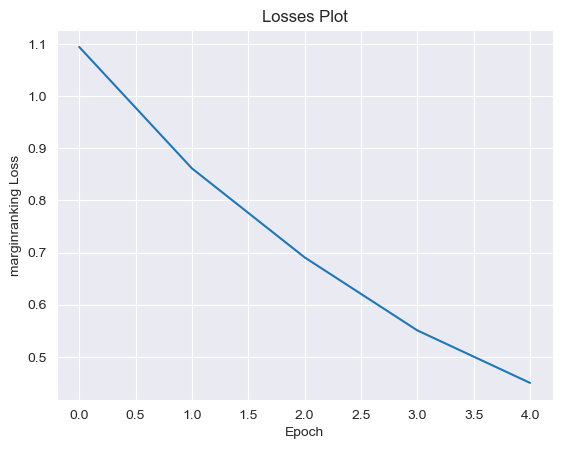

In [6]:
# pipeline_result.plot_losses()

## Evaluation
If the results are the same, it means that the traces are the same

### Rank Based Evaluator

inverse harmonic mean rank == mean reciprocal rank https://cthoyt.com/2021/04/19/pythagorean-mean-ranks.html

Pykeen does not allow for a raw evaluation, filtered only.

In [6]:
model = pipeline_result.model

In [8]:
results_training_filtered = evaluate(model=model,mapped_triples=pipeline_result.training.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples],
                                    batch_size = batch_size)
print("Training filtered evaluation")
show_metrics(results_training_filtered.to_dict())

Evaluating on cpu:   0%|          | 0.00/35.6k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 216.63s seconds


Training filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.013225,0.013225,0.013225
hits_at_1,0.010349,0.010349,0.010349
hits_at_3,0.011474,0.011474,0.011474
hits_at_5,0.012121,0.012121,0.012121
hits_at_10,0.014061,0.014061,0.014061


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.026140,0.026140,0.026140
hits_at_1,0.011108,0.011108,0.011108
hits_at_3,0.018870,0.018870,0.018870
hits_at_5,0.026547,0.026547,0.026547
hits_at_10,0.046317,0.046317,0.046317


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.019682,0.019682,0.019682
hits_at_1,0.010729,0.010729,0.010729
hits_at_3,0.015172,0.015172,0.015172
hits_at_5,0.019334,0.019334,0.019334
hits_at_10,0.030189,0.030189,0.030189


In [7]:
results_validation_filtered = evaluate(model=model,mapped_triples=validation.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples],
                                      batch_size = batch_size)
print("Validation filtered evaluation")
show_metrics(results_validation_filtered.to_dict())

Evaluating on cpu:   0%|          | 0.00/8.80k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 56.53s seconds


Validation filtered evaluation
head
                            optimistic  realistic  pessimistic
inverse_harmonic_mean_rank    0.010648   0.010648     0.010648
hits_at_1                     0.009658   0.009658     0.009658
hits_at_3                     0.010226   0.010226     0.010226
hits_at_5                     0.010908   0.010908     0.010908
hits_at_10                    0.011135   0.011135     0.011135
tail
                            optimistic  realistic  pessimistic
inverse_harmonic_mean_rank    0.010929   0.010929     0.010929
hits_at_1                     0.009658   0.009658     0.009658
hits_at_3                     0.010340   0.010340     0.010340
hits_at_5                     0.011021   0.011021     0.011021
hits_at_10                    0.011476   0.011476     0.011476
both
                            optimistic  realistic  pessimistic
inverse_harmonic_mean_rank    0.010789   0.010789     0.010789
hits_at_1                     0.009658   0.009658     0.009658
hits_at_3

In [8]:
results_validation_filtered = evaluate(model=model,mapped_triples=validation.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = False,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples],
                                      batch_size = batch_size)
print("Validation raw evaluation")
show_metrics(results_validation_filtered.to_dict())

Evaluating on cpu:   0%|          | 0.00/8.80k [00:00<?, ?triple/s]

ValueError: RankBasedEvaluator needs the true scores!

In [10]:
results_testing_filtered = evaluate(model=model,mapped_triples=testing.mapped_triples,
                            evaluator = RankBasedEvaluator(filtered = True,metrics = ['meanreciprocalrank', HitsAtK(1),
                                                                                      HitsAtK(3), HitsAtK(5), HitsAtK(10)],
                                                          add_defaults = False),mode=None,
                            additional_filter_triples=[pipeline_result.training.mapped_triples,
                                                      validation.mapped_triples],
                                   batch_size = batch_size)
print("Testing filtered evaluation")
show_metrics(results_testing_filtered.to_dict())

Evaluating on cpu:   0%|          | 0.00/11.2k [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 69.71s seconds


Testing filtered evaluation
head


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.012201,0.012201,0.012201
hits_at_1,0.010445,0.010445,0.010445
hits_at_3,0.010891,0.010891,0.010891
hits_at_5,0.011784,0.011784,0.011784
hits_at_10,0.013480,0.013480,0.013480


tail


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.016511,0.016511,0.016511
hits_at_1,0.011337,0.011337,0.011337
hits_at_3,0.013569,0.013569,0.013569
hits_at_5,0.016515,0.016515,0.016515
hits_at_10,0.021425,0.021425,0.021425


both


,optimistic,realistic,pessimistic
inverse_harmonic_mean_rank,0.014356,0.014356,0.014356
hits_at_1,0.010891,0.010891,0.010891
hits_at_3,0.012230,0.012230,0.012230
hits_at_5,0.014149,0.014149,0.014149
hits_at_10,0.017452,0.017452,0.017452
